In [70]:
pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Glass Identification Dataset

#### Problem Statement:
The dataset describes the chemical properties of glass and involves classifying samples of glass using their chemical properties as one of six classes. The dataset was credited to Vina Spiehler in 1987. The study of classification of types of glass was motivated by criminological investigation. At the scene of the crime, the glass left can be used as evidence...if it is correctly identified!

The chemical compositions are measured as the weight percent in corresponding oxide.

Attribute Information-

1. Id number: 1 to 214
2. RI: refractive index
3. Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)
4. Mg: Magnesium
5. Al: Aluminum
6. Si: Silicon
7. K: Potassium
8.  Ca: Calcium
9. Ba: Barium
10. Fe: Iron
11. Type of glass: (class attribute)

- building_windows_float_processed
- building_windows_non_float_processed
- vehicle_windows_float_processed
- vehicle_windows_non_float_processed (none in this database)
- containers
- tableware
- headlamps

There are 214 observations in the dataset. The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7). 

#### Predict : Type of glass

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('glass.csv',header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [3]:
df.columns

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], dtype='int64')

In [4]:
names = ['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','glass_type']
df.columns = names
df.head()

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
df = df.drop('Id',axis = 1)

### Data Exploration

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RI          214 non-null    float64
 1   Na          214 non-null    float64
 2   Mg          214 non-null    float64
 3   Al          214 non-null    float64
 4   Si          214 non-null    float64
 5   K           214 non-null    float64
 6   Ca          214 non-null    float64
 7   Ba          214 non-null    float64
 8   Fe          214 non-null    float64
 9   glass_type  214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [7]:
df.select_dtypes("number").describe().T

,count,mean,std,min,25%,50%,75%,max
RI,214.0,1.518365,0.003037,1.51115,1.516522,1.51768,1.519157,1.53393
Na,214.0,13.407850,0.816604,10.73000,12.907500,13.30000,13.825000,17.38000
Mg,214.0,2.684533,1.442408,0.00000,2.115000,3.48000,3.600000,4.49000
Al,214.0,1.444907,0.499270,0.29000,1.190000,1.36000,1.630000,3.50000
Si,214.0,72.650935,0.774546,69.81000,72.280000,72.79000,73.087500,75.41000
K,214.0,0.497056,0.652192,0.00000,0.122500,0.55500,0.610000,6.21000
Ca,214.0,8.956963,1.423153,5.43000,8.240000,8.60000,9.172500,16.19000
Ba,214.0,0.175047,0.497219,0.00000,0.000000,0.00000,0.000000,3.15000
Fe,214.0,0.057009,0.097439,0.00000,0.000000,0.00000,0.100000,0.51000
glass_type,214.0,2.780374,2.103739,1.00000,1.000000,2.00000,3.000000,7.00000


- Almost all columns have mean~median

### Data Cleaning

#### Missing Values

In [8]:
df.isnull().sum()

RI            0
Na            0
Mg            0
Al            0
Si            0
K             0
Ca            0
Ba            0
Fe            0
glass_type    0
dtype: int64

#### Duplicate Values

In [9]:
df.duplicated().any()

True

- There seem to be Duplicate Values in the Dataset

In [10]:
#The below code will show duplicate values in the Dataset
df[df.duplicated(keep=False)]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
38,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [11]:
df = df.drop_duplicates(keep='first')
df.reset_index(drop = True, inplace = True)

In [12]:
df.duplicated().any()

False

- The Duplicated Values are Removed

In [13]:
df.shape

(213, 10)

In [14]:
df.glass_type.unique()

array([1, 2, 3, 5, 6, 7], dtype=int64)

 - There are 6 unique values in the Target Variable

#### Exploratory Data Analysis

In [15]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,glass_type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


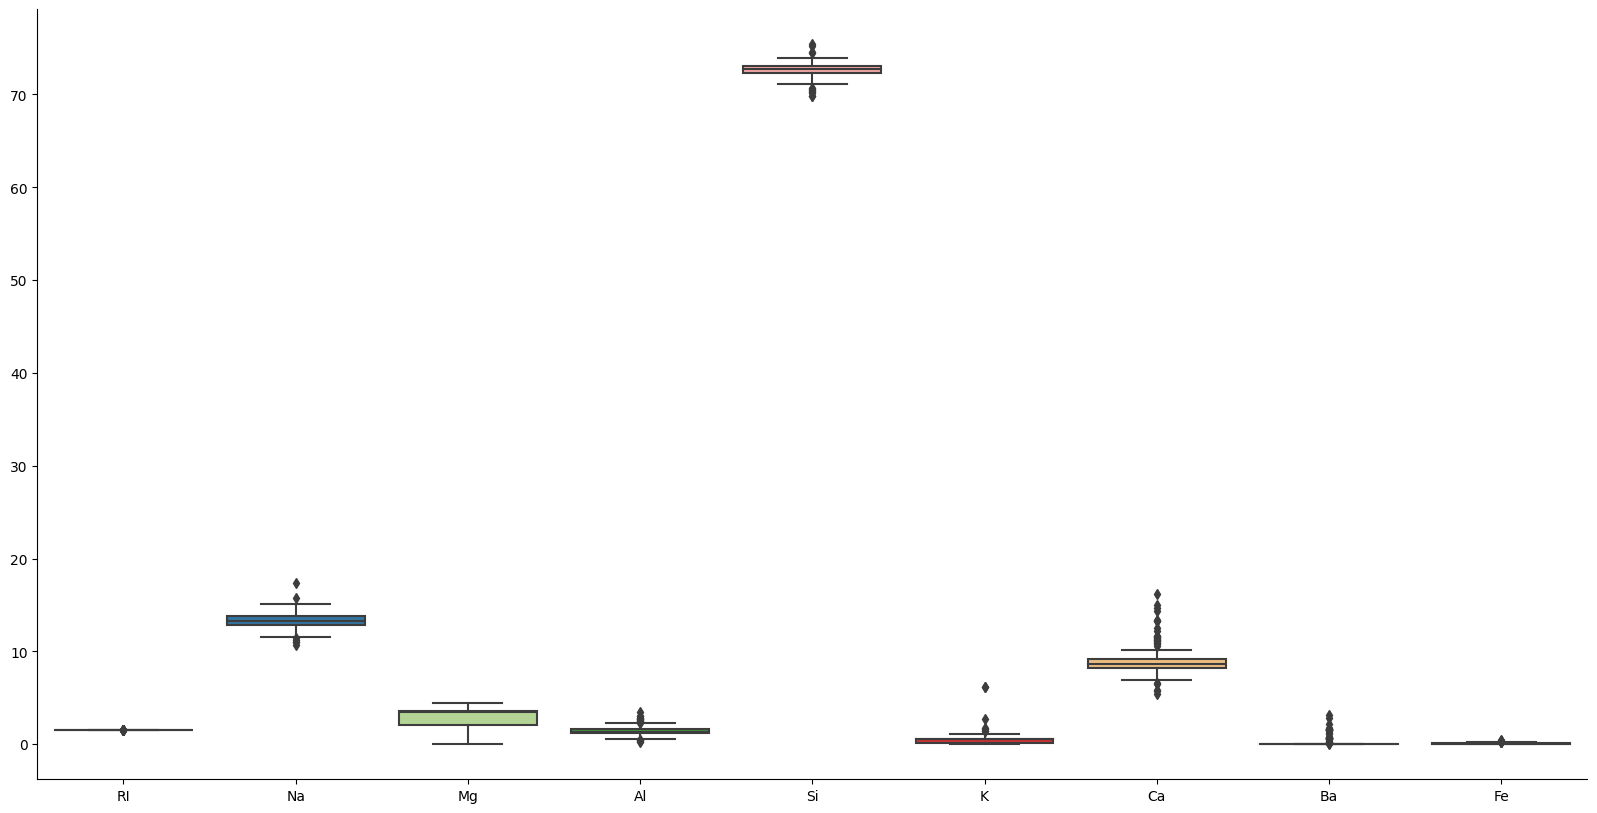

In [16]:
fig,ax=plt.subplots(figsize=(20, 10))
sns.boxplot(data=df.loc[:,"RI":"Fe"], palette='Paired',ax=ax)
sns.despine()

Text(0.5, 0.98, 'Features by Glass type')

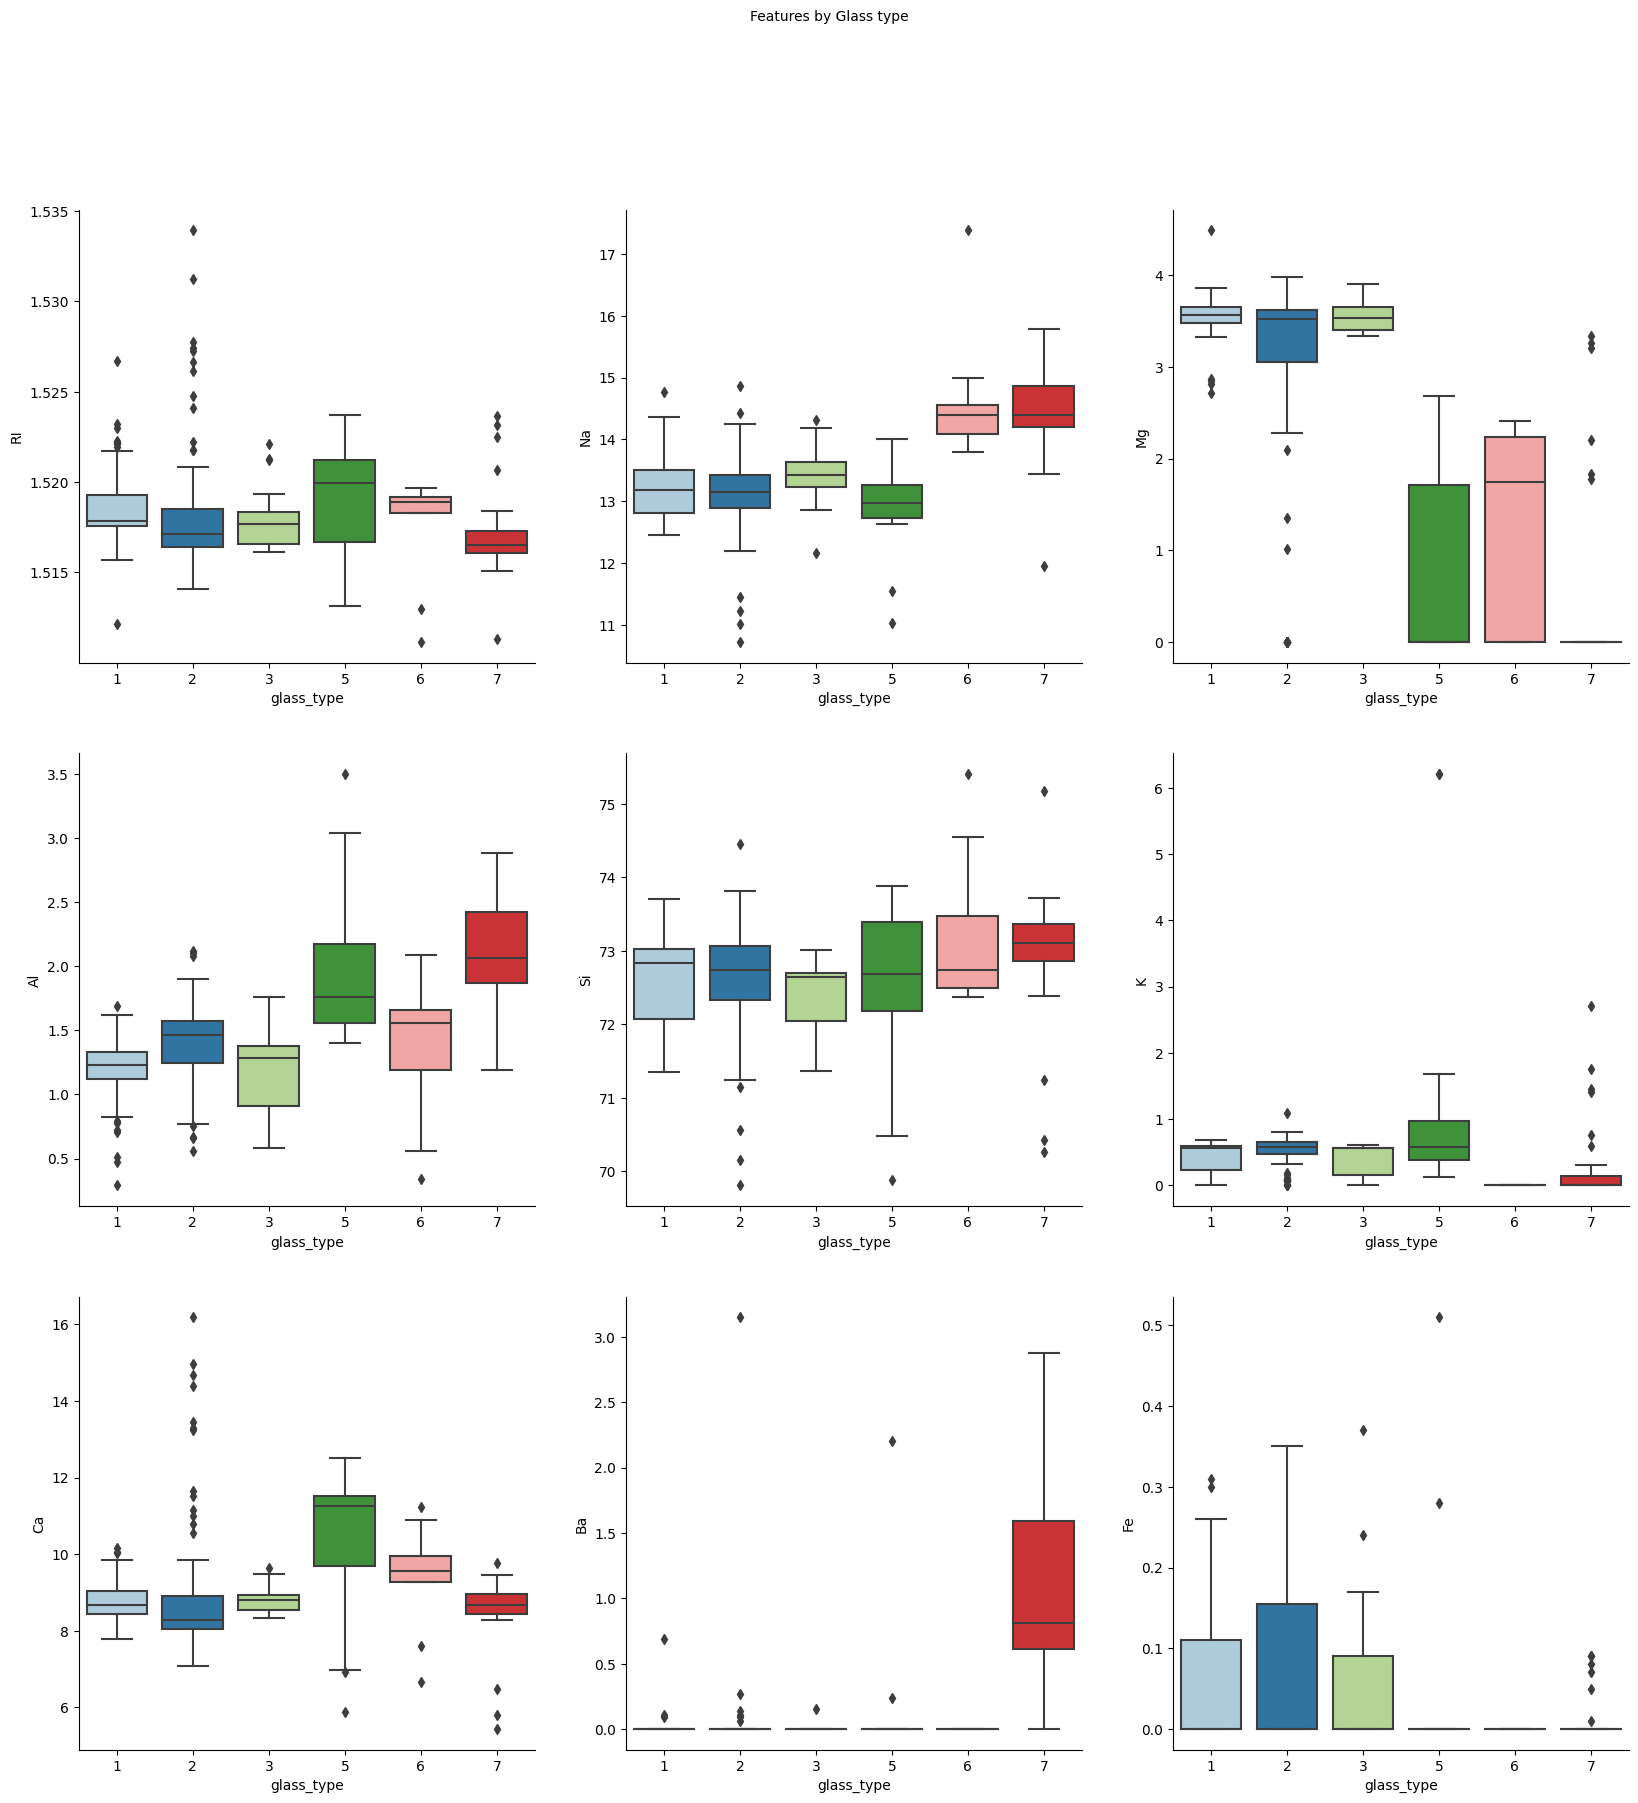

In [17]:
fig, axs = plt.subplots(ncols=3,nrows=3,figsize=(20, 20))
features = ['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']
for i, feature in enumerate(features):
    row = i // 3
    col = i % 3
    sns.boxplot(x='glass_type', y=feature, data=df, palette='Paired', ax=axs[row][col])
sns.despine()
fig.suptitle('Features by Glass type', fontsize=10)

<Figure size 5000x5000 with 0 Axes>

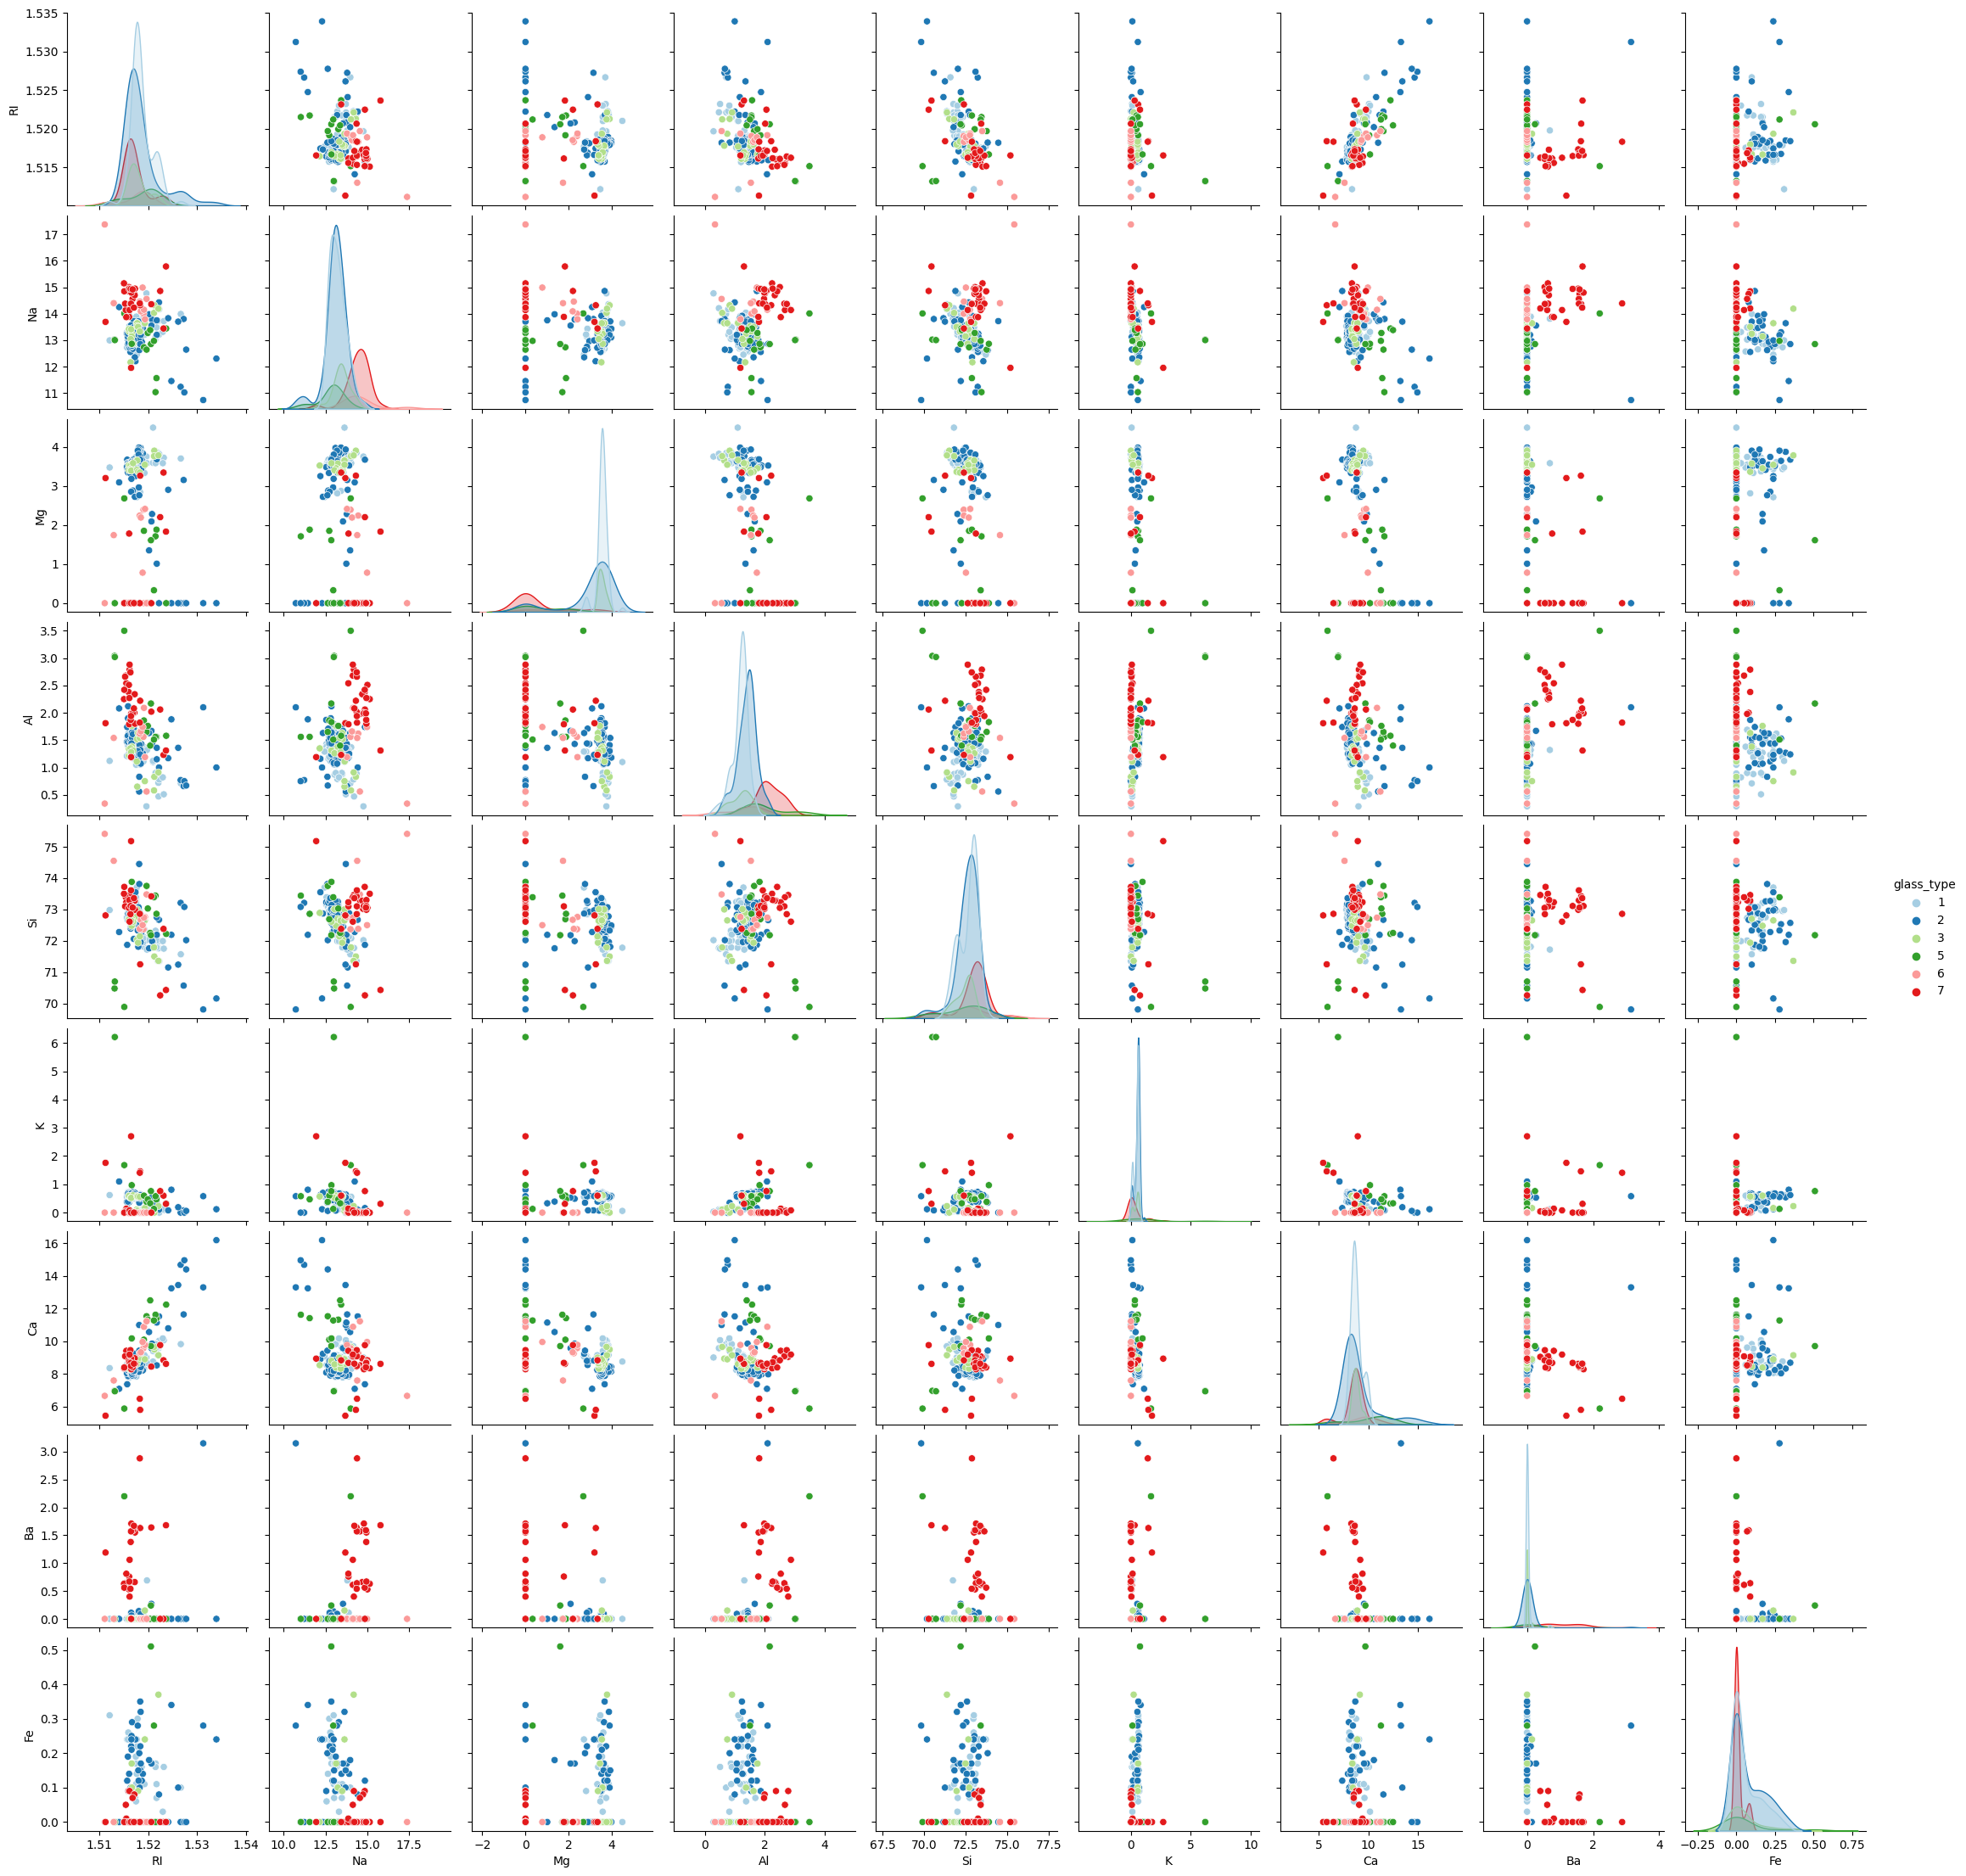

In [18]:
# distribution of features 
plt.figure(figsize=[50, 50])
sns.pairplot(df, vars=df.columns[:-1], hue='glass_type', palette='Paired')

- None of the features are normally distrubuted. There are high degree of skewness of features, such as "K", "Ca", "Ba" and "Fe".
- There are many outliers in dataset.
- Some features are class bound. "Fe" element contains predominately in building windows and vehicle glass types, while "Ba" in large amounts contains in headlamps glass. Metal oxides are added to silica melts to contribute different properties to the resulting glass. This explains the dominance of the metal elements in different types of glass.

<AxesSubplot: >

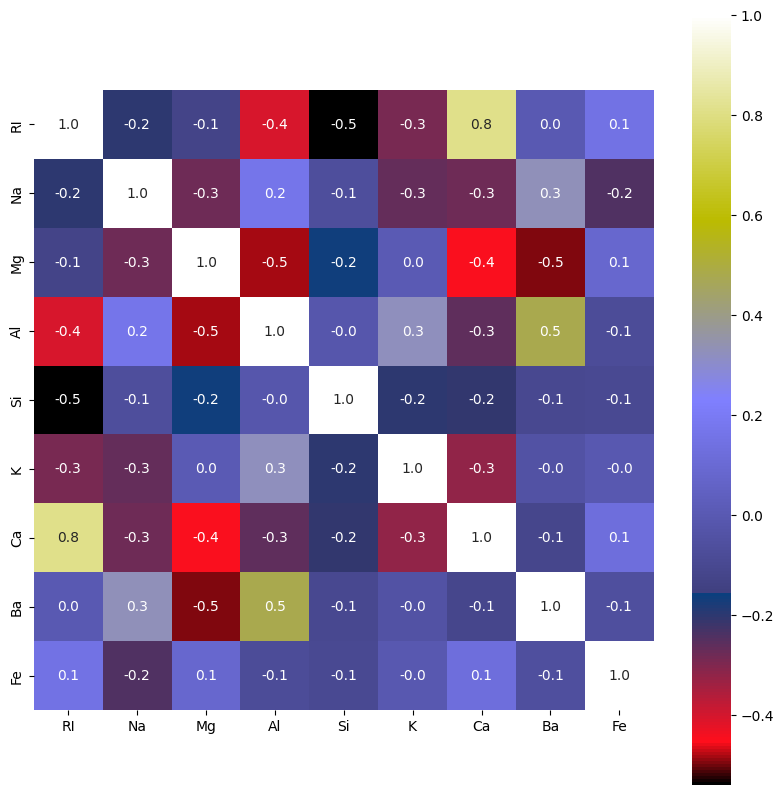

In [19]:
# correlation between features
plt.figure(figsize=[10, 10])
sns.heatmap(df.corr().loc["RI":"Fe","RI":"Fe"], square=True, annot=True, cmap='gist_stern',fmt='.1f')

- There is a strong positive linear relationship between "Ca" and "RI"

Text(0.5, 1.0, 'Count of Glass Types')

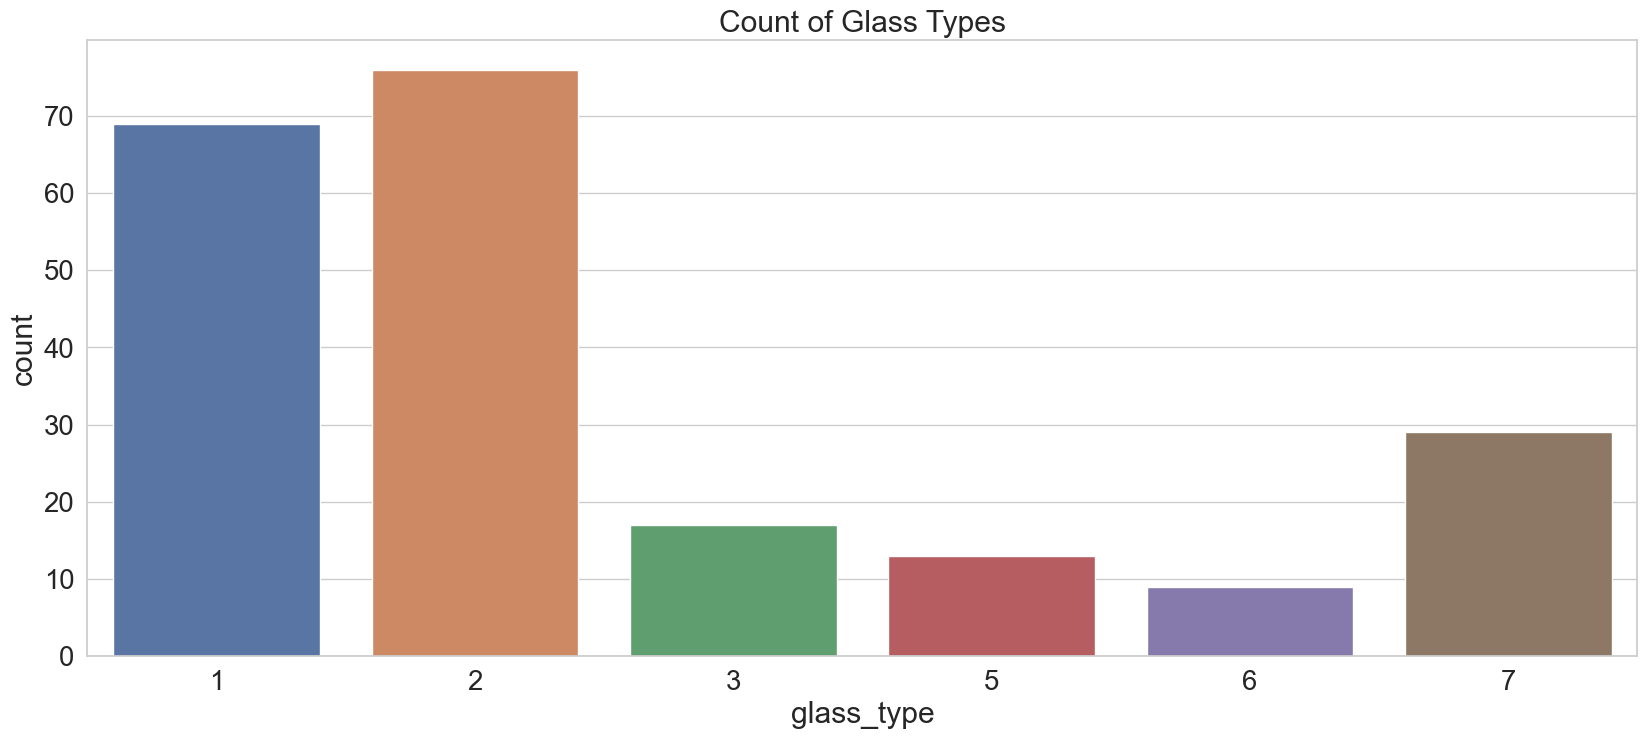

In [20]:
sns.set(style="whitegrid", font_scale=1.8)
plt.subplots(figsize = (20,8))
sns.countplot('glass_type',data=df).set_title('Count of Glass Types')

- We see that Type 2 and 1 have the highest occurences in the dataset, so we need to make sure that the train and test dataset have a good representation from all the types.

In [21]:
df.glass_type.value_counts()

2    76
1    69
7    29
3    17
5    13
6     9
Name: glass_type, dtype: int64

- The data set is highly imbalanced. The two glass types contribute Majority of the Dataset
- When dealing with imbalanced class distributon problem we need to chose strategy either improving data by resampling techniques or using ensamble classification algorithms.

#### Outlier Detection

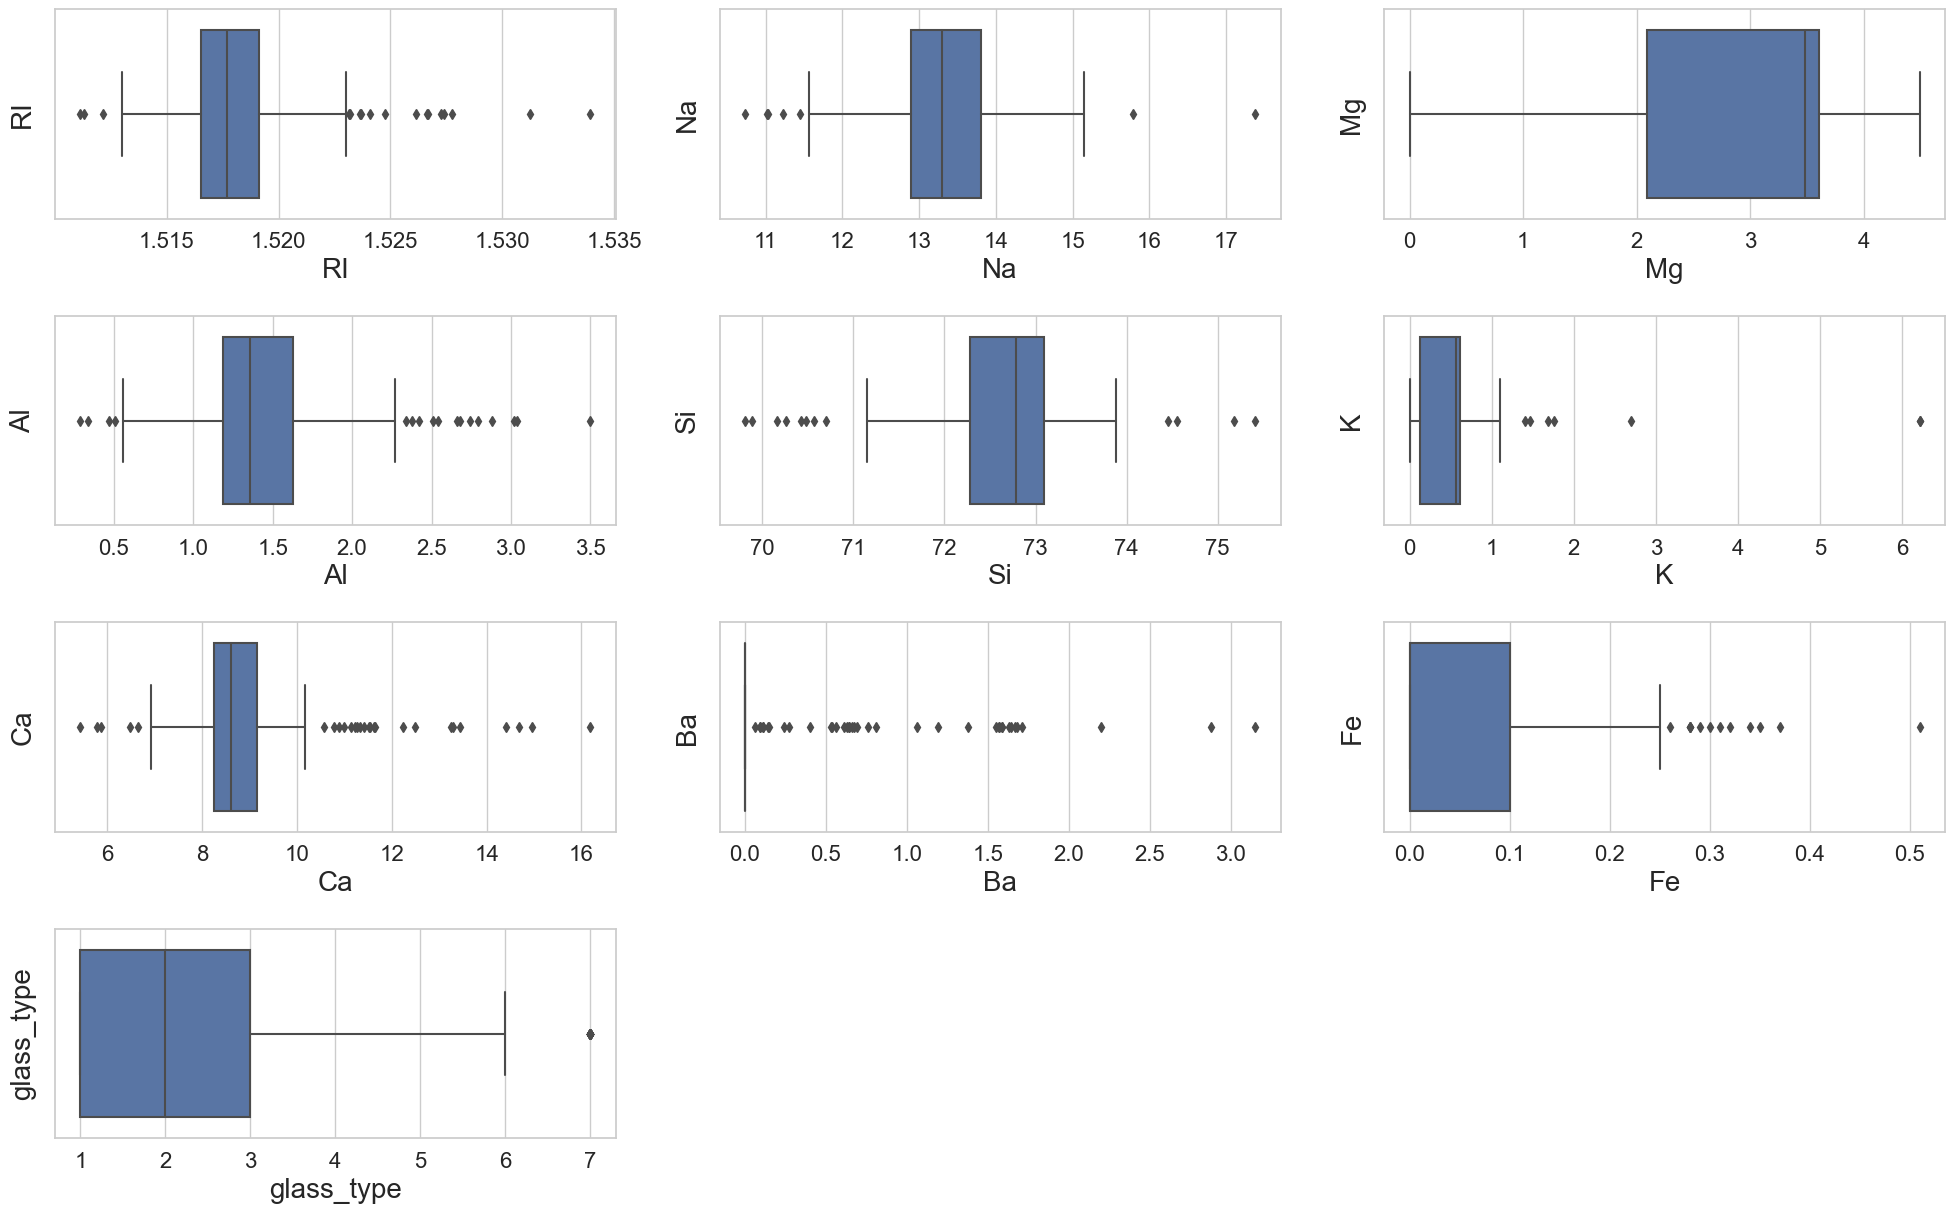

In [22]:
plt.figure(figsize=(20, 15))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns)//2, 3, i+1)
    ax = sns.boxplot(x = df[df.columns[i]])
    ax.set_xlabel(str(df.columns[i]), fontsize = 20)
    ax.set_ylabel(str(df.columns[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

#### Skewness

In [23]:
df_skewness = df.skew()

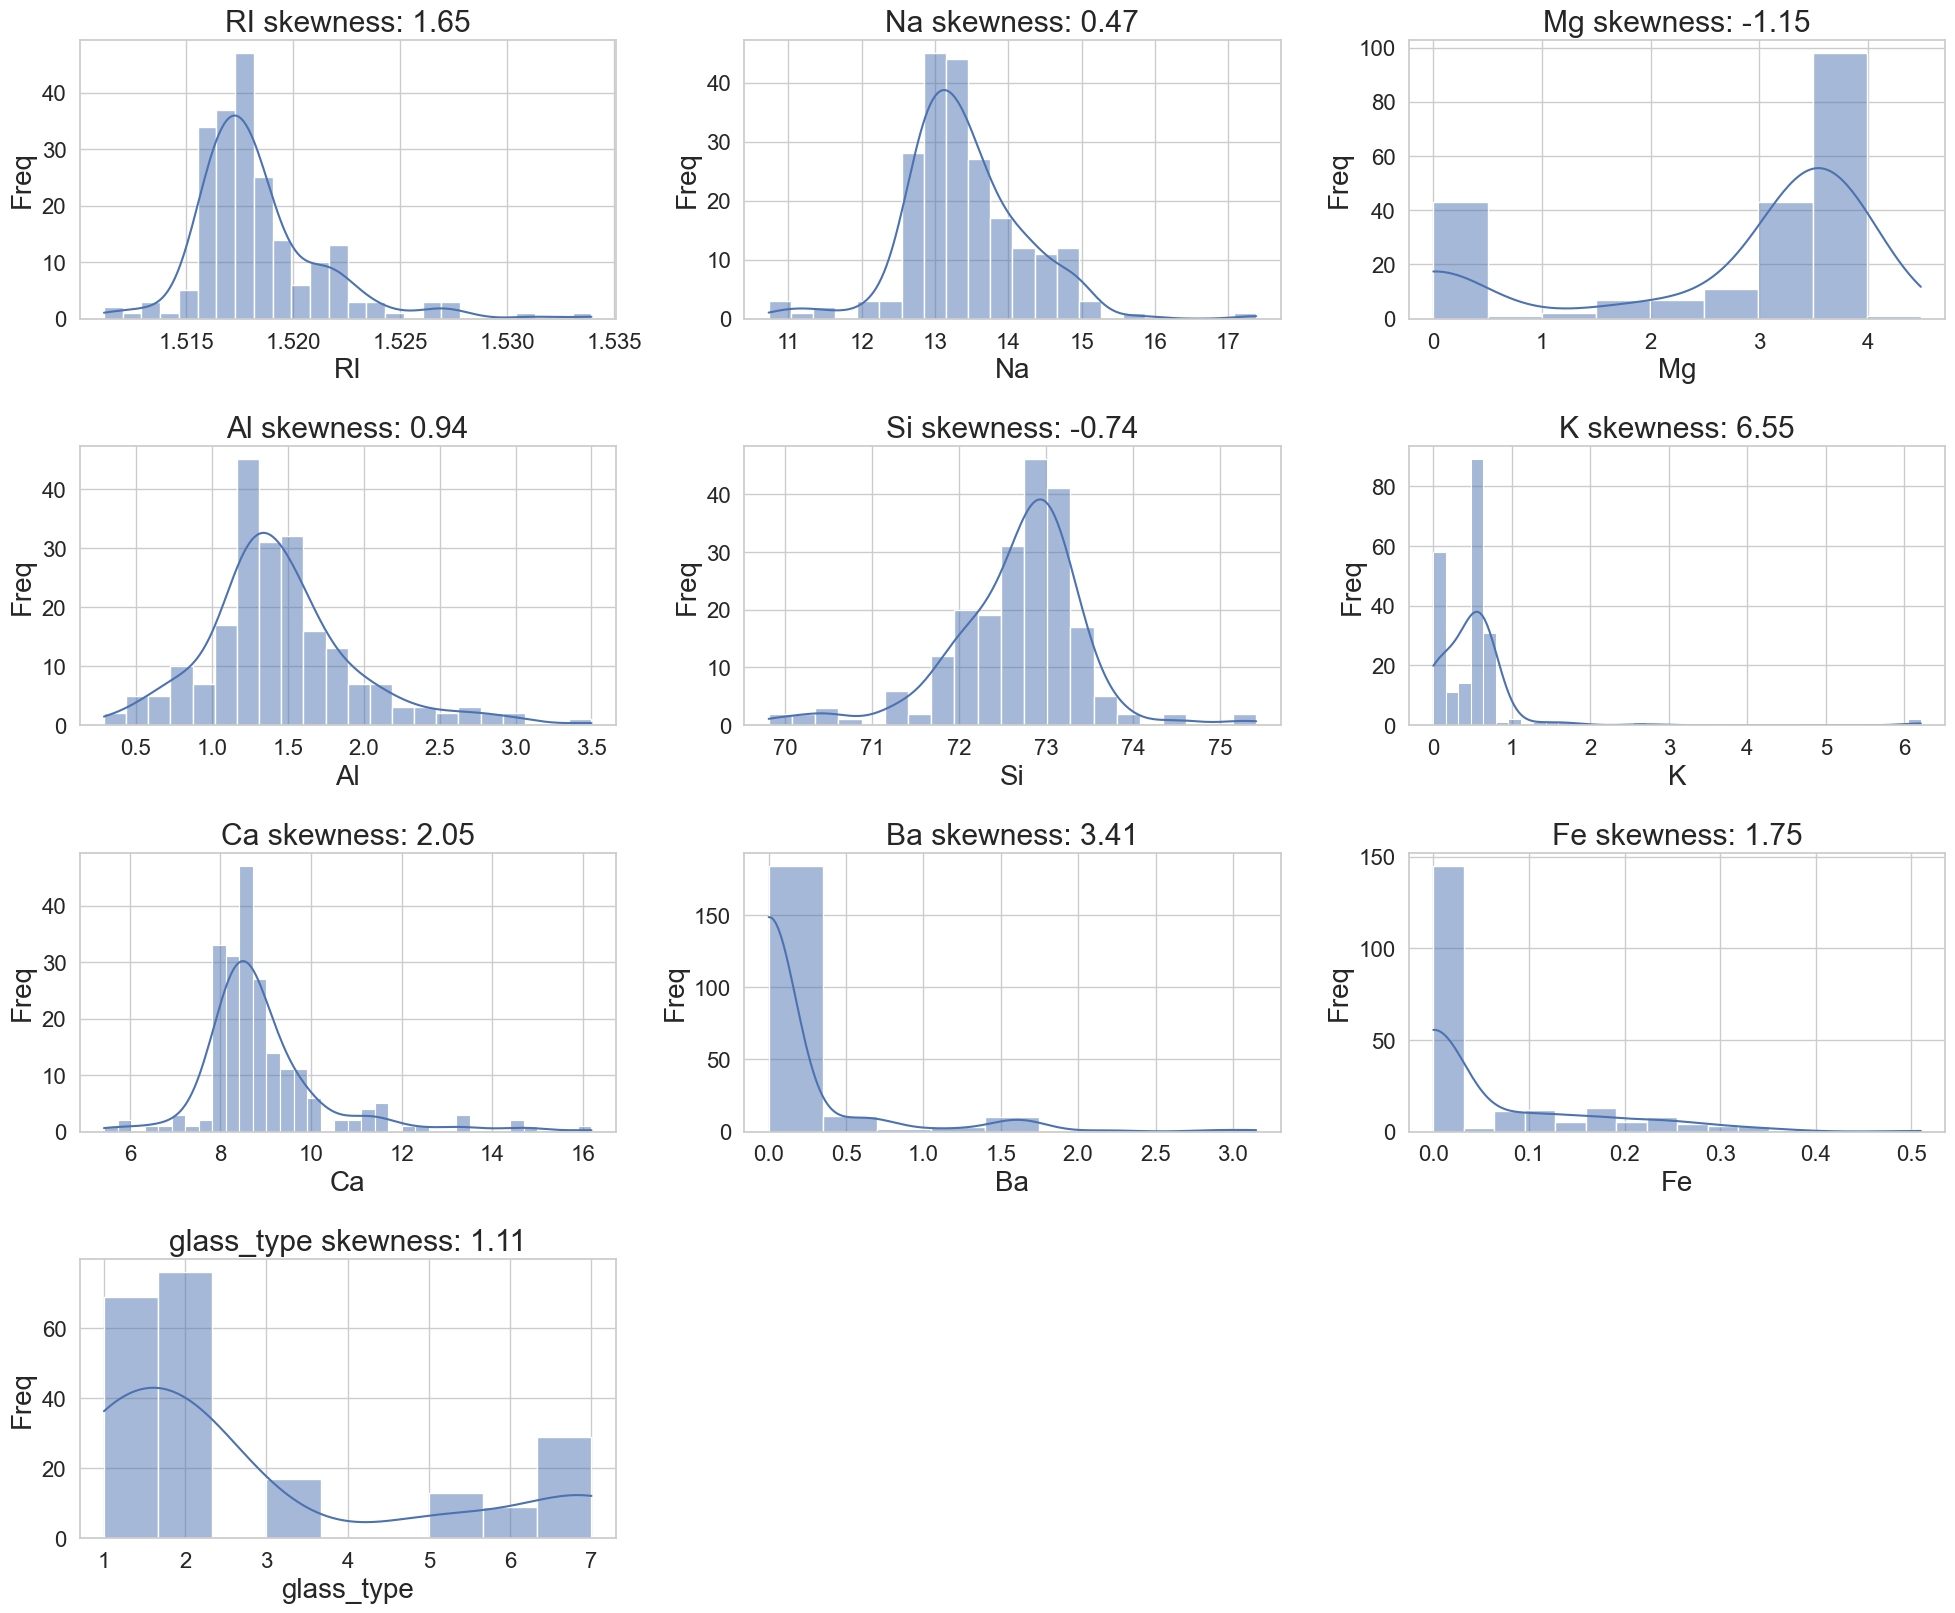

In [24]:
plt.figure(figsize=(20, 20))
for i in range(len(df.columns)):
    plt.subplot(len(df.columns)//2, 3, i+1)
    ax = sns.histplot(df[df.columns[i]],kde = True)
    ax.set_xlabel(str(df.columns[i]), fontsize = 20)
    ax.set_ylabel("Freq", fontsize = 20)
    ax.tick_params(labelsize=16)
    ax.set_title(str(df.columns[i]) + ' skewness: ' + str(round(df_skewness[i], 2)))
plt.tight_layout()
plt.show()

### Feature Engineering

#### Outliers Removal

In [25]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

In [26]:
print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)
df=df1.copy() # reassigning the changed dataframe name to our original dataframe name

Shape of the dataframe before removing outliers:  (213, 10)
Shape of the dataframe after removing outliers:  (193, 10)
Percentage of data loss post outlier removal:  9.389671361502346


#### Data Loss

In [27]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((213-193)/213)*100,'%')

Percentage Data Loss : 9.389671361502346 %


##### Percentage of Data Loss is 9.3% which is Acceptable

In [28]:
df.skew()

RI            0.972271
Na            0.384484
Mg           -1.521807
Al            0.700499
Si           -0.436027
K             0.295387
Ca            1.089590
Ba            3.178256
Fe            1.478611
glass_type    1.277279
dtype: float64

#### Handling Skewness

In [29]:
skew = ['RI','Mg','Ca','Ba','Fe']
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method='yeo-johnson')

In [30]:
df[skew] = transformer.fit_transform(df[skew].values)
df[skew].head()

,RI,Mg,Ca,Ba,Fe
0,3.677614e-16,2.292127,0.005997,-0.430745,-0.680131
1,-4.857226e-17,0.592128,-1.052125,-0.430745,-0.680131
2,-2.289835e-16,0.512768,-1.114783,-0.430745,-0.680131
3,-4.163336e-17,0.739098,-0.582541,-0.430745,-0.680131
4,-7.632783e-17,0.624328,-0.759247,-0.430745,-0.680131


In [31]:
#Skewness after applying PowerTransformer
df.skew()

RI            0.000000
Na            0.384484
Mg           -1.023486
Al            0.700499
Si           -0.436027
K             0.295387
Ca           -0.084253
Ba            1.963711
Fe            0.852040
glass_type    1.277279
dtype: float64

- These are within Accpetable Range

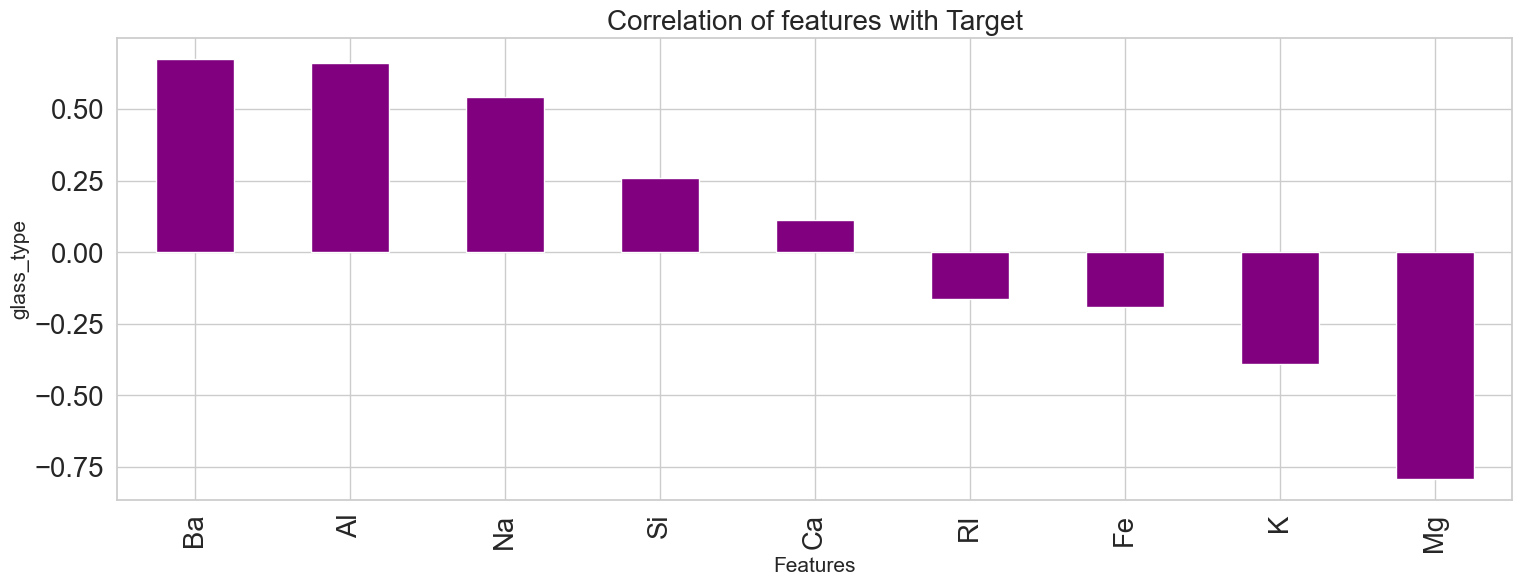

In [32]:
plt.figure(figsize = (18,6))
df.corr()['glass_type'].drop(['glass_type']).sort_values(ascending=False).plot(kind='bar',color = 'purple')
plt.xlabel('Features',fontsize=15)
plt.ylabel('glass_type',fontsize=15)
plt.title('Correlation of features with Target',fontsize = 20)
plt.show()

#### Assigning Labels to the independent Features and Output Feature

In [33]:
X = df.drop('glass_type',axis = 1)
y = df['glass_type']

In [34]:
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,3.677614e-16,13.64,2.292127,1.10,71.78,0.06,0.005997,-0.430745,-0.680131
1,-4.857226e-17,13.89,0.592128,1.36,72.73,0.48,-1.052125,-0.430745,-0.680131
2,-2.289835e-16,13.53,0.512768,1.54,72.99,0.39,-1.114783,-0.430745,-0.680131
3,-4.163336e-17,13.21,0.739098,1.29,72.61,0.57,-0.582541,-0.430745,-0.680131
4,-7.632783e-17,13.27,0.624328,1.24,73.08,0.55,-0.759247,-0.430745,-0.680131
...,...,...,...,...,...,...,...,...,...
207,-2.012279e-16,14.37,-1.943865,2.74,72.85,0.00,0.707747,2.466596,-0.680131
208,-2.220446e-16,14.14,-1.943865,2.88,72.61,0.08,0.446415,2.491567,-0.680131
209,-1.457168e-16,14.92,-1.943865,1.99,73.06,0.00,-0.376591,2.492561,-0.680131
210,3.261280e-16,14.36,-1.943865,2.02,73.42,0.00,-0.331697,2.492578,-0.680131


In [35]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    7
208    7
209    7
210    7
211    7
Name: glass_type, Length: 193, dtype: int64

                      P1    P2   P3    P4    P5    P6    P7    P8   P9
Explained_Variance  1.93  1.21  1.0  0.53  0.22  0.13  0.05  0.01  0.0


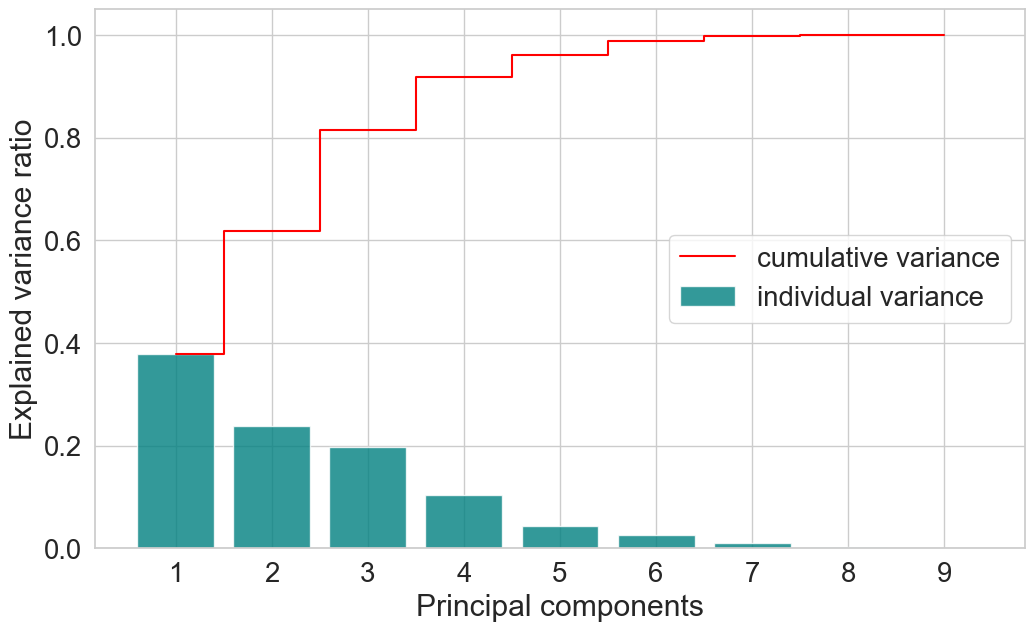

In [36]:
# Performing PCA
from sklearn.decomposition import PCA

pca = PCA(random_state = 1)
pca.fit(X)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
var_df = pd.DataFrame(pca.explained_variance_.round(2), index=["P" + str(i) for i in range(1,10)],
                      columns=["Explained_Variance"])
print(var_df.T)
plt.figure(figsize=(12,7))
plt.bar(range(1,len(cum_var_exp)+1), var_exp, align= 'center', label= 'individual variance', color='teal', alpha = 0.8)
plt.step(range(1,len(cum_var_exp)+1), cum_var_exp, where = 'mid' , label= 'cumulative variance', color='red')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.xticks(np.arange(1,len(var_exp)+1,1))
plt.legend(loc='center right')
plt.show()

- The first 5 components account for about 99% of the total explained variance. We can run the analysis again only with these five components.

In [37]:
pca_red = PCA(n_components=5)
X = pca_red.fit_transform(X)

Now that we have our features and target labels, let us proceed to model development.

In [38]:
X.shape

(193, 5)

In [39]:
y.shape

(193,)

In [40]:
y.value_counts()

1    69
2    68
7    23
3    16
5     9
6     8
Name: glass_type, dtype: int64

- The dataset can be divided into window glass (classes 1-4) and non-window glass (classes 5-7) as mentioned in the Description

- We will divide the 7 categories of Target in to two categories of 1 and 2

In [41]:
glass_type = []
for i in df['glass_type']:
    if i >= 1 and i <= 4:
        glass_type.append('1')
    elif i >= 5 and i <= 7:
        glass_type.append('2')

df['glass_type'] = glass_type

set(glass_type)

{'1', '2'}

In [42]:
y = df.glass_type

In [43]:
y

0      1
1      1
2      1
3      1
4      1
      ..
207    2
208    2
209    2
210    2
211    2
Name: glass_type, Length: 193, dtype: object

In [44]:
y.value_counts()

1    153
2     40
Name: glass_type, dtype: int64

### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

### Model Training 

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,precision_score,f1_score,roc_auc_score,roc_curve
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=61)

In [47]:
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',y_test.shape)

Training feature matrix size: (154, 5)
Training target vector size: (154,)
Test feature matrix size: (39, 5)
Test target vector size: (39,)


### Model Selection

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

#### Logistic Regression

In [49]:
log_reg=LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred1 = log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred1))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred1))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred1))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.9487179487179487


Confusion matrix of Logistics Regression : 
 [[30  0]
 [ 2  7]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           1       0.94      1.00      0.97        30
           2       1.00      0.78      0.88         9

    accuracy                           0.95        39
   macro avg       0.97      0.89      0.92        39
weighted avg       0.95      0.95      0.95        39



##### Cross Validation of Logistic Regression

In [50]:
from sklearn.model_selection import cross_val_score
CVscore = cross_val_score(log_reg, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', log_reg, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score LogisticRegression() :

CVScore : [0.84615385 0.87179487 0.92307692 0.89473684 0.97368421]
Mean CV Score : 0.9018893387314441
Std deviation : 0.0439697569415395


#### Decision Tree Classifier

In [51]:
dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred2 = dtc.predict(X_test)
print('\033[1m'+'Decision Tree Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Decision Tree Classifier :'+'\033[0m', accuracy_score(y_test, y_pred2))
print('\n')
print('\033[1m'+'Confusion matrix of Decision Tree Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred2))
print('\n')
print('\033[1m'+'classification Report of Decision Tree Classifier'+'\033[0m \n',classification_report(y_test, y_pred2))

Decision Tree Classifier Evaluation


Accuracy Score of Decision Tree Classifier : 0.9230769230769231


Confusion matrix of Decision Tree Classifier : 
 [[30  0]
 [ 3  6]]


classification Report of Decision Tree Classifier 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        30
           2       1.00      0.67      0.80         9

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39



##### Cross Validation of DTC

In [52]:
CVscore = cross_val_score(dtc, X, y, cv = 5)
print('\033[1m'+'Cross Validation Score', dtc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score DecisionTreeClassifier() :

CVScore : [0.94871795 0.79487179 0.92307692 0.84210526 0.97368421]
Mean CV Score : 0.8964912280701756
Std deviation : 0.06734616314547745


#### Random Forest Classifier

In [53]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)
y_pred3 = rfc.predict(X_test)
print('\033[1m'+'Random Forest Classifier'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Random Forest Classifier :'+'\033[0m', accuracy_score(y_test, y_pred3))
print('\n')
print('\033[1m'+'Confusion matrix of Random Forest Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred3))
print('\n')
print('\033[1m'+'classification Report of Random Forest Classifier'+'\033[0m \n',classification_report(y_test, y_pred3))

Random Forest Classifier


Accuracy Score of Random Forest Classifier : 0.9743589743589743


Confusion matrix of Random Forest Classifier : 
 [[30  0]
 [ 1  8]]


classification Report of Random Forest Classifier 
               precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39



#### Cross Validation of RFC

In [54]:
CVscore = cross_val_score(rfc, X, y, cv =5)
print('\033[1m'+'Cross Validation Score', rfc, ':'+'\033[0m\n')
print("CVScore :" ,CVscore)
print("Mean CV Score :",CVscore.mean())
print("Std deviation :",CVscore.std())

Cross Validation Score RandomForestClassifier() :

CVScore : [0.79487179 0.84615385 0.92307692 0.84210526 0.97368421]
Mean CV Score : 0.8759784075573549
Std deviation : 0.06384335688809012


#### Gradient Boosting Classifier

In [55]:
grad_bc=GradientBoostingClassifier()
grad_bc.fit(X_train,y_train)
y_pred4 = grad_bc.predict(X_test)
print('\033[1m'+'Gradient Boosting Classifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Gradient Boosting Classifier :'+'\033[0m', accuracy_score(y_test, y_pred4))
print('\n')
print('\033[1m'+'Confusion matrix of Gradient Boosting Classifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred4))
print('\n')
print('\033[1m'+'classification Report of Gradient Boosting Classifier'+'\033[0m \n',classification_report(y_test, y_pred4))

Gradient Boosting Classifier Evaluation


Accuracy Score of Gradient Boosting Classifier : 0.9230769230769231


Confusion matrix of Gradient Boosting Classifier : 
 [[30  0]
 [ 3  6]]


classification Report of Gradient Boosting Classifier 
               precision    recall  f1-score   support

           1       0.91      1.00      0.95        30
           2       1.00      0.67      0.80         9

    accuracy                           0.92        39
   macro avg       0.95      0.83      0.88        39
weighted avg       0.93      0.92      0.92        39



### RandomForestClassifier is performing the Best among all the Models

#### Starting with Hyperparameter tuning using RadomisedSearchCv

In [56]:
from sklearn.model_selection import RandomizedSearchCV

#No of trees in Random forest
n_estimators = [int(x) for x in np.linspace(start = 50, stop = 500, num = 10)]

#No of features tp consider at every split
max_features = ['auto','sqrt','log2']

#Maximum number of levels in a tree
max_depth = [int(x) for x in np.linspace(10,500,10)]

#Minimum number of samples required to split a node
min_samples_split = [1,2,3,4,5,7,9]

#Samples required for each leaf node
min_samples_leaf = [1,2,4,6,8]

#Create the random grid

random_grid = {
                'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'criterion':['entropy','gini']            
}
print(random_grid)

{'n_estimators': [50, 100, 150, 200, 250, 300, 350, 400, 450, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500], 'min_samples_split': [1, 2, 3, 4, 5, 7, 9], 'min_samples_leaf': [1, 2, 4, 6, 8], 'criterion': ['entropy', 'gini']}


In [57]:
rf_model = RandomForestClassifier()
rf_randomCv = RandomizedSearchCV(estimator=rf_model,param_distributions=random_grid, n_iter=100, cv=10, verbose=2,
                                random_state=69, n_jobs=-1)
rf_randomCv.fit(X_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [10, 64, 118, 173, 227,
                                                      282, 336, 391, 445, 500],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [1, 2, 3, 4, 5, 7,
                                                              9],
                                        'n_estimators': [50, 100, 150, 200, 250,
                                                         300, 350, 400, 450,
                                                         500]},
                   random_state=69, verbose=2)

In [58]:
rf_randomCv.best_params_

{'n_estimators': 50,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 336,
 'criterion': 'entropy'}

In [59]:
best_random_grid = rf_randomCv.best_estimator_

In [60]:
y_pred_final = best_random_grid.predict(X_test)
print(accuracy_score(y_test,y_pred_final))
print(confusion_matrix(y_test,y_pred_final))
print(classification_report(y_test,y_pred_final))

0.9743589743589743
[[30  0]
 [ 1  8]]
              precision    recall  f1-score   support

           1       0.97      1.00      0.98        30
           2       1.00      0.89      0.94         9

    accuracy                           0.97        39
   macro avg       0.98      0.94      0.96        39
weighted avg       0.98      0.97      0.97        39



#### Confusion matrix

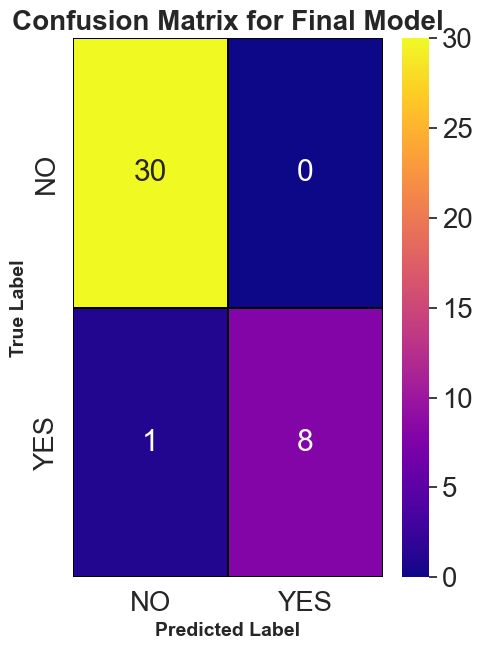

In [69]:
# Lets plot confusion matrix for  FinalModel
Matrix = confusion_matrix(y_test, y_pred_final)

x_labels = ["NO","YES"]
y_labels = ["NO","YES"]

fig , ax = plt.subplots(figsize=(5,7))
sns.heatmap(Matrix, annot = True,linewidths=.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="plasma", xticklabels = x_labels, yticklabels = y_labels)

plt.xlabel("Predicted Label",fontsize=14,fontweight='bold')
plt.ylabel("True Label",fontsize=14,fontweight='bold')
plt.title('Confusion Matrix for Final Model',fontsize=20,fontweight='bold')
plt.show()


In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import RocCurveDisplay
plt.show()
auc_score = roc_auc_score(y_test, best_random_grid.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

Auc Score :
 0.9444444444444444


#### Saving and Deployment of the model

In [62]:
import pickle
filename = 'GlassTYpePrediction.pkl'
pickle.dump(best_random_grid,open(filename,'wb'))

In [63]:
a = np.array(y_test)
predicted = np.array(best_random_grid.predict(X_test))
df_com = pd.DataFrame({'Original':a,'Predicted':predicted},index=range(len(a)))

In [64]:
df_com

,Original,Predicted
0,1,1
1,1,1
2,2,2
3,1,1
4,1,1
5,1,1
6,1,1
7,1,1
8,1,1
9,2,2
